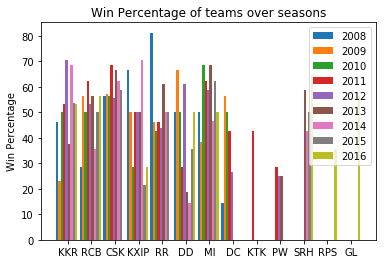

In [5]:
import repository as repo
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

matchesDF = repo.match_df
teamsDF = repo.team_df
seasonsDF = repo.season_df

data = pd.DataFrame( columns=('team_id','short_name','matches', 'wins','season_id',"win_percent"))

def getMatchesForTeamInSeason(team_id,season_id):
    return matchesDF[((matchesDF["Team_Name_Id"] == team_id) | (matchesDF["Opponent_Team_Id"] == team_id)) & (matchesDF["Season_Id"]==season_id)]

def getMatchesWonByTeamInSeason(team_id,season_id):
    return matchesDF[(matchesDF["Match_Winner_Id"] == team_id) & (matchesDF["Season_Id"] == season_id)]

pos = 0
for index,row in teamsDF.iterrows():
    team_id = row["Team_Id"]
    short_name = row["Team_Short_Code"]
    for i,r in seasonsDF.iterrows():
        season_id = r["Season_Id"]
        matches = len(getMatchesForTeamInSeason(team_id,season_id))
        wins = len(getMatchesWonByTeamInSeason(team_id,season_id))
        win_percent = 0
        if(matches > 0):
            win_percent = (wins*100)/matches
        new_row = [team_id,short_name,matches,wins,season_id,win_percent]
        data.loc[pos] = new_row
        pos = pos+1


def plotWinPercentForSeasons():

    bars =[]
    X = np.array(teamsDF["Team_Id"])
    X_LABELS = teamsDF["Team_Short_Code"]
    ax = plot.subplot()
    ax.set_ylabel('Win Percentage')
    ax.set_title('Win Percentage of teams over seasons')
    w = 0
    for i,r in seasonsDF.iterrows():
        season_id = r["Season_Id"]
        seasonDF = data[(data["season_id"] == season_id)]
        Y = np.array(seasonDF["win_percent"])
        bar = ax.bar(X + w,Y,width=0.1,align='center')
        bars.append(bar)
        w = w + 0.1
    ax.legend((bars[0],bars[1],bars[2],bars[3],bars[4],bars[5],bars[6],bars[7],bars[8]),("2008","2009","2010","2011","2012","2013","2014","2015","2016"))
    ax.set_xticks(X + w/2)
    ax.set_xticklabels(X_LABELS)
    plot.show()

plotWinPercentForSeasons()
